In [914]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy import stats

In [915]:
red_df = pd.read_excel("../datasets/cleaned_red_wine.xlsx")
white_df = pd.read_excel("../datasets/cleaned_white_wine.xlsx")
combined_df = pd.read_excel("../datasets/combined_wine_data.xlsx")

dfs = [red_df, white_df, combined_df]

##### Explore the features of the three data frames separately. Identify the dependent and the independent variables

In [916]:
features = combined_df.columns.drop('quality')
print("Independent variables:", list(features))
print("Dependent variable: quality")

Independent variables: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'type']
Dependent variable: quality


In [917]:
red_df.info()
red_df.shape
red_df.columns
red_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124 entries, 0 to 1123
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1124 non-null   float64
 1   volatile acidity      1124 non-null   float64
 2   citric acid           1124 non-null   float64
 3   residual sugar        1124 non-null   float64
 4   chlorides             1124 non-null   float64
 5   free sulfur dioxide   1124 non-null   int64  
 6   total sulfur dioxide  1124 non-null   int64  
 7   density               1124 non-null   float64
 8   pH                    1124 non-null   float64
 9   sulphates             1124 non-null   float64
 10  alcohol               1124 non-null   float64
 11  quality               1124 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 105.5 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [918]:
white_df.info()
white_df.shape
white_df.columns
white_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3815 entries, 0 to 3814
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3815 non-null   float64
 1   volatile acidity      3815 non-null   float64
 2   citric acid           3815 non-null   float64
 3   residual sugar        3815 non-null   float64
 4   chlorides             3815 non-null   float64
 5   free sulfur dioxide   3815 non-null   float64
 6   total sulfur dioxide  3815 non-null   float64
 7   density               3815 non-null   float64
 8   pH                    3815 non-null   float64
 9   sulphates             3815 non-null   float64
 10  alcohol               3815 non-null   float64
 11  quality               3815 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 357.8 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [919]:
combined_df.info()
combined_df.shape
combined_df.columns
combined_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4939 entries, 0 to 4938
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4939 non-null   float64
 1   volatile acidity      4939 non-null   float64
 2   citric acid           4939 non-null   float64
 3   residual sugar        4939 non-null   float64
 4   chlorides             4939 non-null   float64
 5   free sulfur dioxide   4939 non-null   float64
 6   total sulfur dioxide  4939 non-null   float64
 7   density               4939 non-null   float64
 8   pH                    4939 non-null   float64
 9   sulphates             4939 non-null   float64
 10  alcohol               4939 non-null   float64
 11  quality               4939 non-null   int64  
 12  type                  4939 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 501.7+ KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [920]:
red_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1124.000000,1124.000000,1124.00000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000
mean,8.143950,0.522678,0.24508,2.179537,0.078376,14.812278,41.104093,0.996577,3.325667,0.627580,10.342823,5.622776
std,1.444876,0.164194,0.17996,0.437907,0.013766,8.583848,24.661787,0.001559,0.130154,0.111864,0.947403,0.723635
min,5.100000,0.120000,0.00000,1.200000,0.042000,1.000000,6.000000,0.992560,2.980000,0.330000,8.700000,4.000000
25%,7.100000,0.390000,0.08000,1.900000,0.069750,8.000000,22.000000,0.995520,3.237500,0.550000,9.500000,5.000000
50%,7.800000,0.520000,0.24000,2.100000,0.078000,13.000000,35.000000,0.996600,3.330000,0.610000,10.100000,6.000000
75%,9.000000,0.630000,0.39000,2.400000,0.087000,20.000000,54.000000,0.997500,3.402500,0.700000,11.000000,6.000000
max,12.300000,1.005000,0.73000,3.600000,0.116000,40.000000,113.000000,1.000400,3.680000,0.940000,13.000000,7.000000


In [921]:
white_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3815.000000,3815.000000,3815.000000,3815.000000,3815.000000,3815.000000,3815.000000,3815.000000,3815.000000,3815.000000,3815.000000,3815.000000
mean,6.813460,0.263647,0.322446,6.366999,0.042423,34.702359,137.330013,0.993894,3.187691,0.481942,10.556351,5.879423
std,0.737631,0.075897,0.083689,4.919839,0.009875,15.015001,41.244259,0.002866,0.137928,0.098186,1.194168,0.753690
min,4.800000,0.080000,0.110000,0.600000,0.015000,2.000000,21.000000,0.987110,2.820000,0.220000,8.400000,4.000000
25%,6.300000,0.210000,0.270000,1.800000,0.035000,24.000000,107.000000,0.991625,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.310000,5.250000,0.042000,34.000000,133.000000,0.993600,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.310000,0.370000,9.625000,0.049000,45.000000,167.000000,0.995900,3.280000,0.540000,11.400000,6.000000
max,8.800000,0.485000,0.540000,20.800000,0.071000,79.000000,253.000000,1.001960,3.570000,0.760000,14.200000,7.000000


In [922]:
combined_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4939.000000,4939.000000,4939.000000,4939.000000,4939.000000,4939.000000,4939.000000,4939.000000,4939.000000,4939.000000,4939.000000,4939.000000
mean,7.116248,0.322597,0.304839,5.414031,0.050605,30.175845,115.431261,0.994505,3.219091,0.515086,10.507757,5.821016
std,1.098302,0.149591,0.117589,4.671387,0.018593,16.138372,55.499570,0.002857,0.147964,0.118411,1.146115,0.754597
min,4.800000,0.080000,0.000000,0.600000,0.015000,1.000000,6.000000,0.987110,2.820000,0.220000,8.400000,4.000000
25%,6.400000,0.220000,0.250000,1.800000,0.037000,17.000000,79.000000,0.992100,3.120000,0.430000,9.500000,5.000000
50%,6.900000,0.280000,0.300000,2.900000,0.046000,29.000000,117.000000,0.994740,3.210000,0.500000,10.400000,6.000000
75%,7.600000,0.370000,0.370000,8.100000,0.058000,41.000000,155.000000,0.996740,3.320000,0.590000,11.300000,6.000000
max,12.300000,1.005000,0.730000,20.800000,0.116000,79.000000,253.000000,1.001960,3.680000,0.940000,14.200000,7.000000


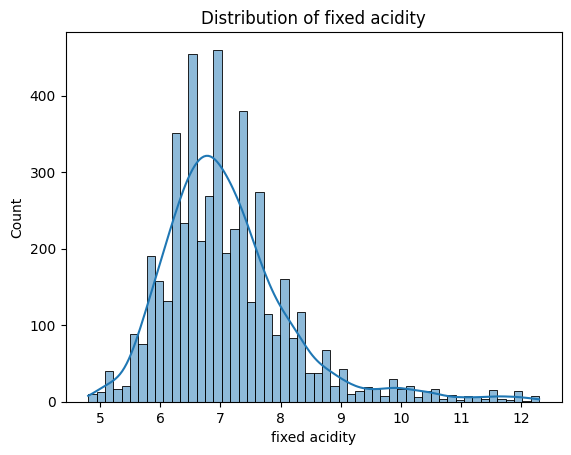

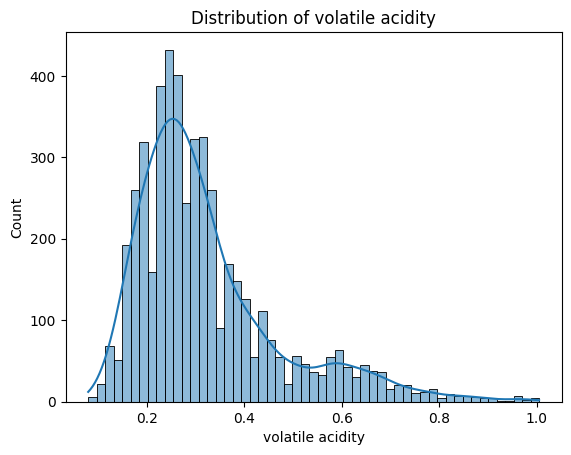

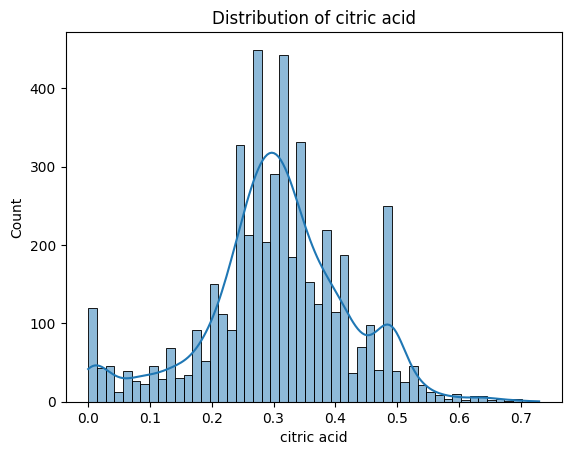

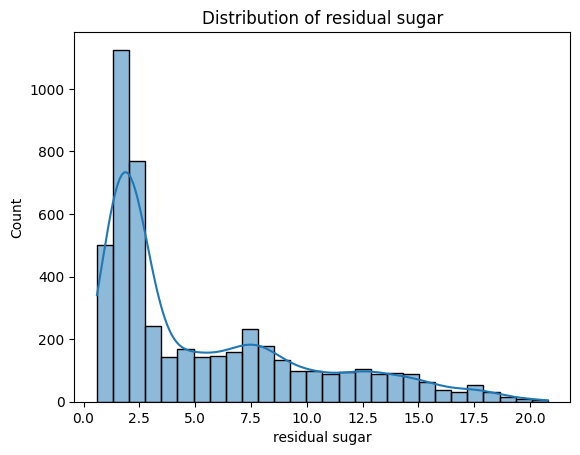

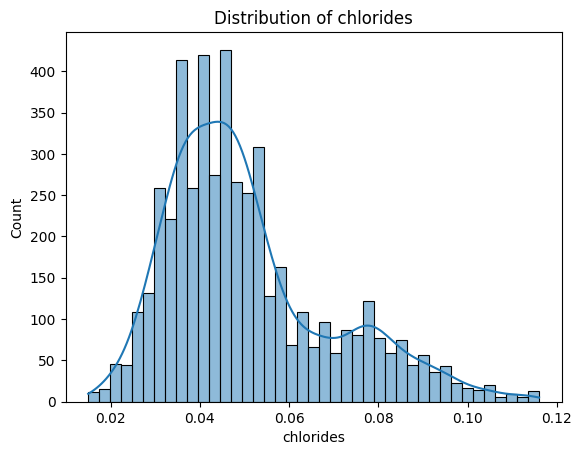

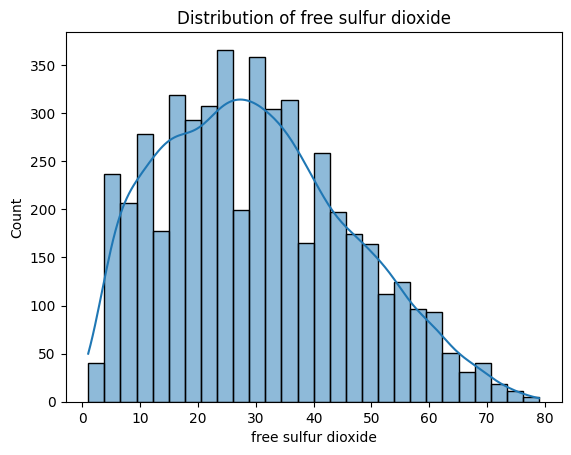

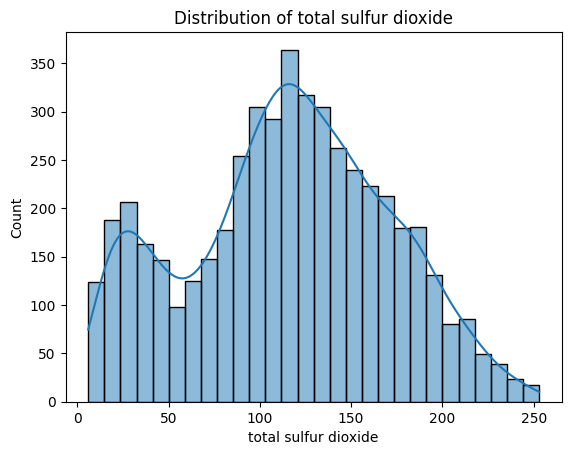

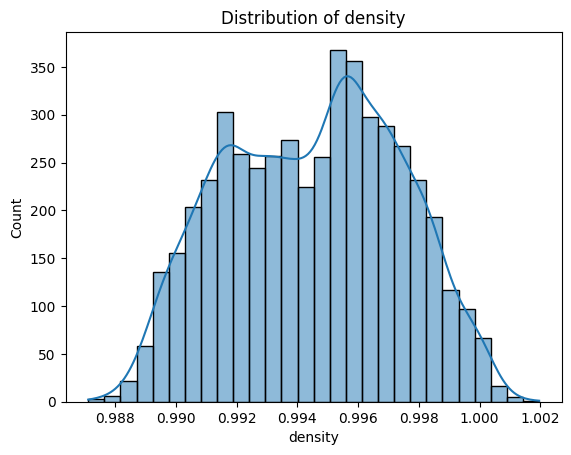

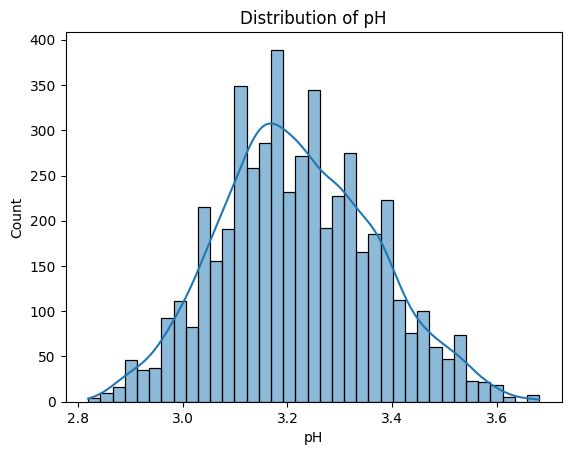

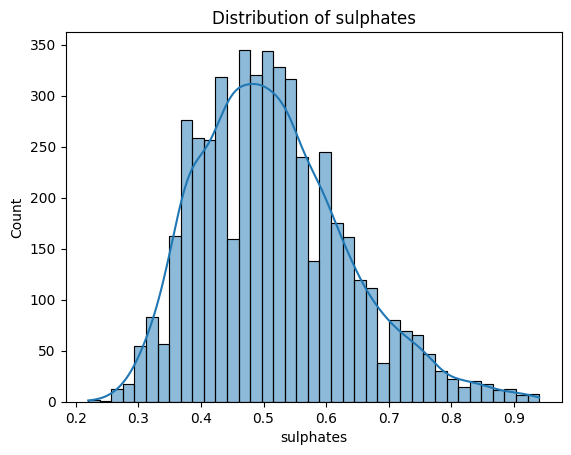

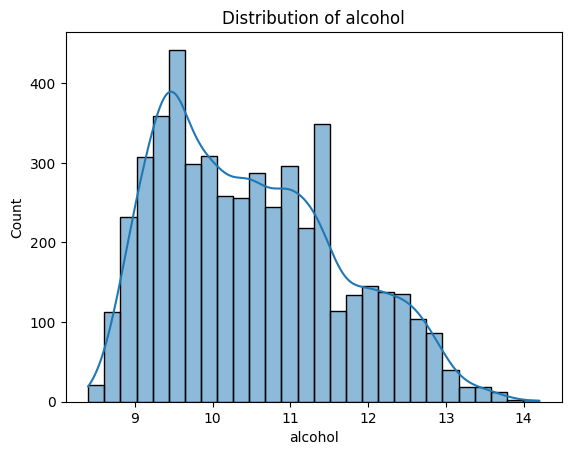

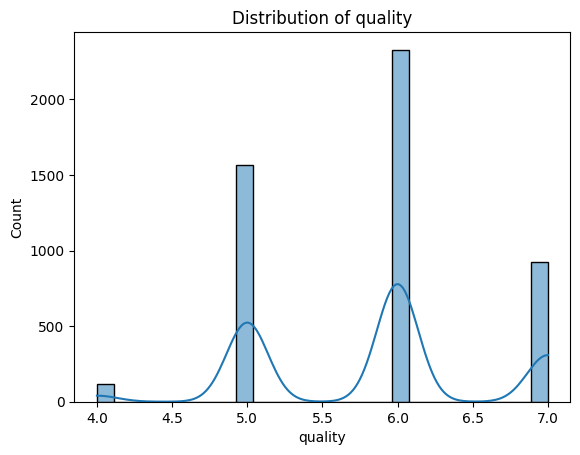

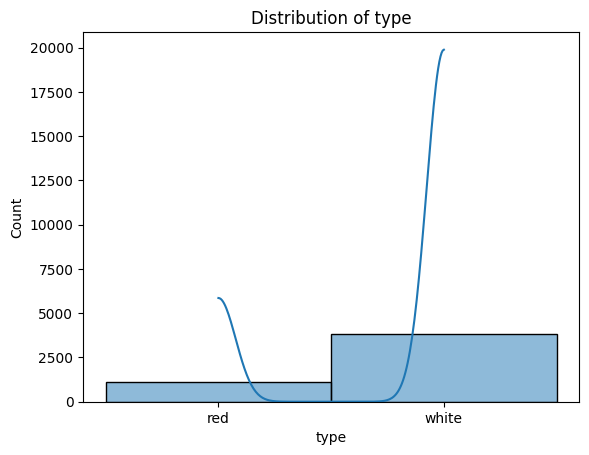

In [923]:
for col in combined_df.columns:
    plt.figure()
    sbn.histplot(combined_df[col], kde=True)
    plt.title(f"Distribution of {col}")


##### Transform the categorical data into numeric, applying appropriate encoding methods.

In [924]:
label_encoder = preprocessing.LabelEncoder()

combined_df['type'] = label_encoder.fit_transform(df['type'])

combined_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4934,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4935,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4936,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4937,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


##### Calculate the descriptive statistics of the numeric data. Check whether the distribution of the values of the attributes is normal.

In [925]:
combined_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,4939.000000,4939.000000,4939.000000,4939.000000,4939.000000,4939.000000,4939.000000,4939.000000,4939.000000,4939.000000,4939.000000,4939.000000,4939.000000
mean,7.116248,0.322597,0.304839,5.414031,0.050605,30.175845,115.431261,0.994505,3.219091,0.515086,10.507757,5.821016,0.772424
std,1.098302,0.149591,0.117589,4.671387,0.018593,16.138372,55.499570,0.002857,0.147964,0.118411,1.146115,0.754597,0.419310
min,4.800000,0.080000,0.000000,0.600000,0.015000,1.000000,6.000000,0.987110,2.820000,0.220000,8.400000,4.000000,0.000000
25%,6.400000,0.220000,0.250000,1.800000,0.037000,17.000000,79.000000,0.992100,3.120000,0.430000,9.500000,5.000000,1.000000
50%,6.900000,0.280000,0.300000,2.900000,0.046000,29.000000,117.000000,0.994740,3.210000,0.500000,10.400000,6.000000,1.000000
75%,7.600000,0.370000,0.370000,8.100000,0.058000,41.000000,155.000000,0.996740,3.320000,0.590000,11.300000,6.000000,1.000000
max,12.300000,1.005000,0.730000,20.800000,0.116000,79.000000,253.000000,1.001960,3.680000,0.940000,14.200000,7.000000,1.000000


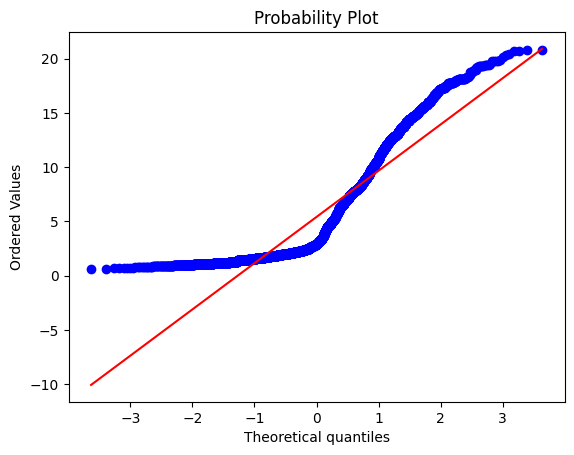

In [926]:
stats.probplot(combined_df['residual sugar'], dist="norm", plot=plt)
plt.show()


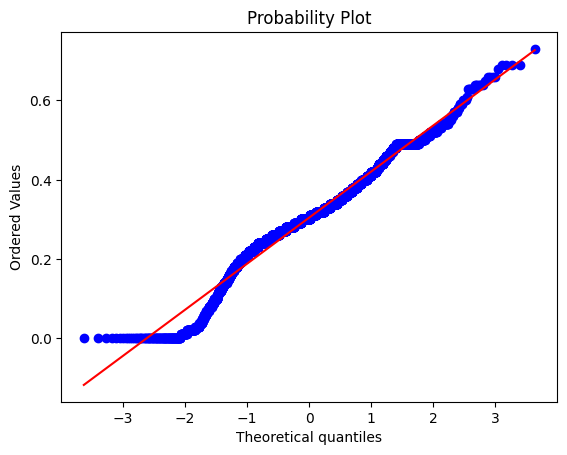

In [927]:
stats.probplot(combined_df['citric acid'], dist="norm", plot=plt)
plt.show()

##### Plot diagrams that visualize the differences in red and white wine samples. Use as many diagrams as appropriate. Use the diagrams as a support for answering the following questions: